In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import csv
from apyori import apriori
import seaborn as sns

In [2]:
data = pd.read_csv(r'economic_freedom_index2019_data.csv', encoding='ISO-8859-1')
print(data.head())

   CountryID Country Name      WEBNAME                        Region  \
0          1  Afghanistan  Afghanistan                  Asia-Pacific   
1          2      Albania      Albania                        Europe   
2          3      Algeria      Algeria  Middle East and North Africa   
3          4       Angola       Angola            Sub-Saharan Africa   
4          5    Argentina    Argentina                      Americas   

   World Rank  Region Rank  2019 Score  Property Rights  \
0       152.0         39.0        51.5             19.6   
1        52.0         27.0        66.5             54.8   
2       171.0         14.0        46.2             31.6   
3       156.0         33.0        50.6             35.9   
4       148.0         26.0        52.2             47.8   

   Judical Effectiveness  Government Integrity  ...      Country  \
0                   29.6                  25.2  ...  Afghanistan   
1                   30.6                  40.4  ...      Albania   
2       

# Eksploracja danych- projekt

## Techniki redukcji wymiarów oraz klasteryzacja i klasyfikacja

Redukcja wymiarów za pomocą Analizy Składowych Głównych (PCA, od ang. Principal Component Analysis) to technika statystyczna stosowana w przetwarzaniu sygnałów i analizie danych, która przekształca oryginalne dane składające się z wielu zmiennych w nowy zestaw niepowiązanych ze sobą zmiennych, nazywanych głównymi składowymi. Proces ten zmniejsza liczbę zmiennych, zachowując przy tym jak najwięcej informacji zawartych w oryginalnym zestawie danych. PCA działa dobrze, gdy dane są rozłożone wokół kilku głównych składowych i są linearnie od siebie odseparowane. Celem PCA jest znalezienie kierunków w przestrzeni danych, w których rozkład danych ma największą wariancję.

*W prostych słowach, PCA pomaga nam znaleźć najważniejsze rzeczy w danych, które tłumaczą ich różnice.
Wyobraź sobie, że masz zestaw danych zawierających informacje o różnych owocach, takie jak ich rozmiar, kształt i kolor. PCA pomaga nam znaleźć te cechy, które najlepiej różnicują te owoce. Na przykład, jeśli rozmiar i kształt mają większy wpływ na to, czy owoc jest jabłkiem czy bananem niż kolor, to PCA pomoże nam to ustalić.
W praktyce, PCA sprowadza dane do prostszej postaci, eliminując mniej ważne informacje i pozostawiając tylko te, które są najbardziej istotne. Dzięki temu możemy lepiej zrozumieć, co się dzieje w danych i łatwiej nimi zarządzać. Jest to przydatne w wielu dziedzinach, od analizy danych po rozpoznawanie obrazów i wiele innych.*

Pierwszym krokiem jest standaryzacja danych, co oznacza przeskalowanie każdej zmiennej tak, aby miała średnią wartość równą 0 i odchylenie standardowe równe 1. Standaryzacja jest ważna, ponieważ PCA jest wrażliwa na różnice w skali między zmiennymi.

Inicjalizacja standardowego skalera, który normalizuje dane tak, aby miały średnią równą 0 i odchylenie standardowe równe 1.

In [3]:
# Wybór zmiennych numerycznych
numerical_data = data.select_dtypes(include=[np.number])

Standardyzacja danych numerycznych, zastępując brakujące wartości (NaN) zerami.

In [4]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data.fillna(0))

Macierz kowariancji nie jest bezpośrednio obliczana w kodzie, ale standaryzowane dane są przekazywane do obiektu PCA w celu obliczenia składowych głównych.

Algorytm PCA jest inicjalizowany za pomocą `PCA()`, a następnie wywoływana jest metoda `fit_transform()`, która oblicza składowe główne, wartości własne i wektory własne.

In [5]:
pca = PCA()
principal_components = pca.fit_transform(standardized_data)
print(principal_components)

[[ 3.16115012 -2.25893201  0.40100953 ... -0.03542994  0.0272578
   0.06748617]
 [-1.31934207 -0.61550151 -0.09440718 ... -0.13746587  0.34004764
   0.04376334]
 [ 2.21526592  0.2051415  -0.95948938 ...  0.10312178 -0.12763242
  -0.02259357]
 ...
 [ 4.44994603  3.85429348  3.43421827 ... -0.82257868 -0.29457031
  -0.36969045]
 [ 1.28046198 -0.69420452 -0.68743382 ... -0.33761466 -0.02102257
   0.01512662]
 [ 3.9177836  -0.36605602 -1.8885463  ...  0.00872715  0.17393667
   0.09559233]]


In [6]:
print(principal_components[:2])

[[ 3.16115012 -2.25893201  0.40100953 -1.44567717 -0.4445021   0.52110038
   0.58365131  1.32310979  0.29920401  1.52814267 -0.5910434   1.45411675
   0.96345883  0.01588278  0.01692789  0.59136238 -0.30329839  0.06117741
  -0.44028673  0.2411372  -0.00900286  0.11408205 -0.03542994  0.0272578
   0.06748617]
 [-1.31934207 -0.61550151 -0.09440718 -0.59059376  0.25317512 -0.95449279
   1.9447152  -0.01554955  1.06785053 -0.08662633  0.39792882  0.8155314
   0.06857527 -0.08837917 -0.32574799  0.2593933  -0.74564614  0.14962054
   0.33415032  0.14313677 -0.02036827  0.39343893 -0.13746587  0.34004764
   0.04376334]]


Wynik tej operacji to wektor zawierający procentowy udział wariancji wyjaśnionej przez każdą z wybranych składowych głównych. Wartości w tym wektorze wskazują, ile wariancji jest wyjaśniane przez każdą składową główną. Na przykład, pierwsza wartość w wektorze `(0.333938839)` oznacza, że pierwsza składowa główna wyjaśnia około 33,39% wariancji w danych.

In [7]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[3.33938839e-01 1.14058030e-01 9.07098166e-02 6.69025103e-02
 6.36274743e-02 4.81029673e-02 4.27028730e-02 3.78002913e-02
 3.64186509e-02 2.94192410e-02 2.43371689e-02 2.27931616e-02
 1.53432824e-02 1.31411352e-02 1.13825986e-02 1.04736757e-02
 8.38705776e-03 7.06503916e-03 6.10466984e-03 5.67987521e-03
 3.61124214e-03 3.47482370e-03 3.16439430e-03 1.06192651e-03
 2.99255460e-04]


Heatmapa wizualizuje udział wariancji wyjaśnionej przez każdą z wybranych składowych głównych (PCA components). Oto co dokładnie prezentuje heatmapa:
- Na osi poziomej znajdują się składowe główne (PCA components).
- Na osi pionowej znajdują się wartości udziału wariancji wyjaśnionej przez te składowe główne.
- Każdy kwadrat w heatmapie reprezentuje udział wariancji wyjaśnionej przez daną składową główną w danych.
- Im jasniejszy kolor kwadratu, tym większy jest udział wariancji wyjaśnionej przez daną składową.
- Kwadraty są ułożone malejąco względem numeru składowej głównej, z największym udziałem wariancji na początku i malejącym w dalszych składowych.

Heatmapa jest używana do wizualizacji, które składniki główne mają największy wpływ na zmienność danych. Im wyższa wartość wyjaśnionej wariancji dla danej składowej głównej, tym bardziej znaczący jest dany składnik główny. W praktyce pozwala to na wybór, które składniki główne uwzględnić w analizie, biorąc pod uwagę, ile wariancji można wyjaśnić, korzystając z określonej liczby składników głównych.

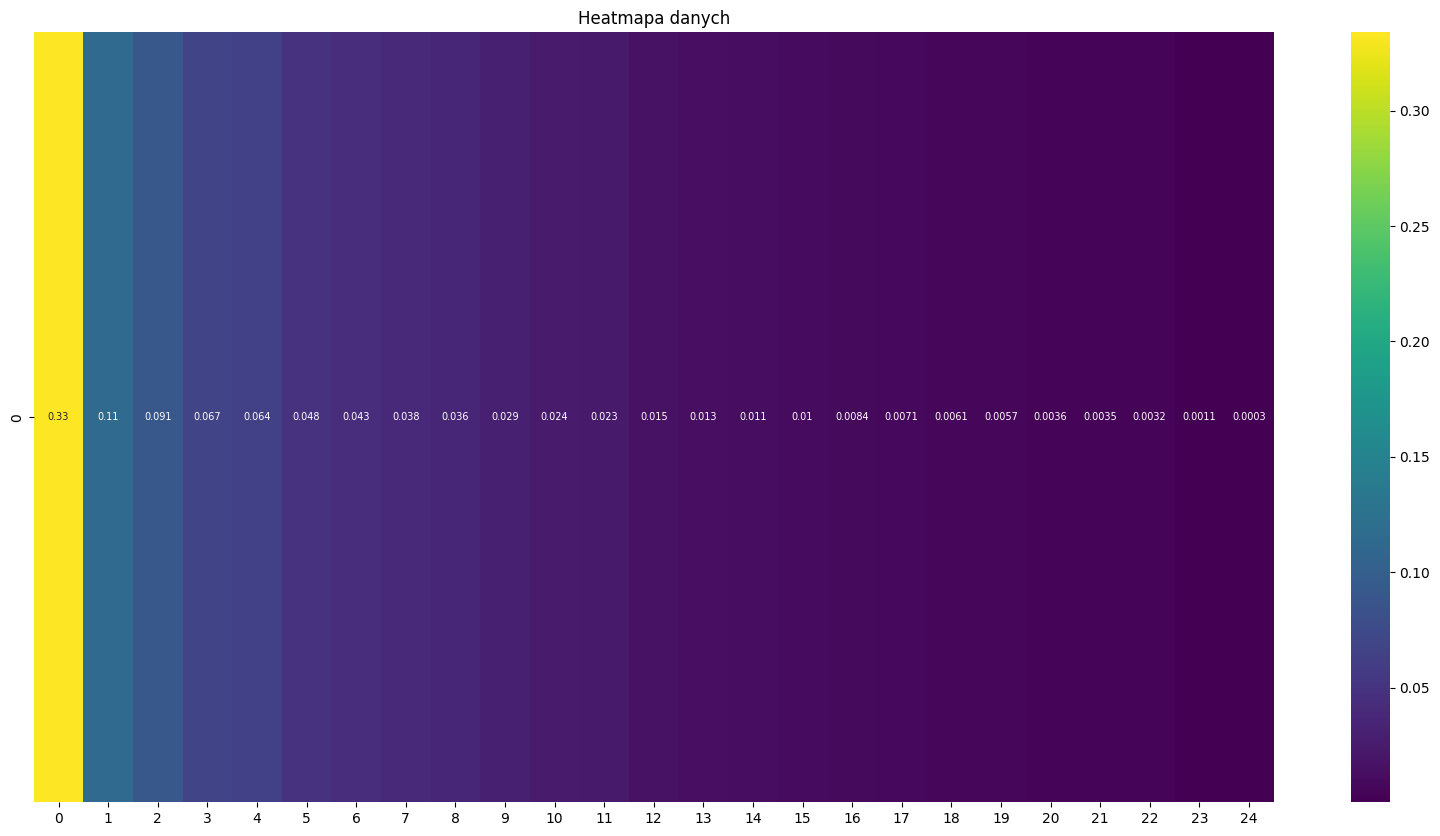

In [26]:
df = pd.DataFrame(explained_variance)
df = df.T

# Tworzenie heatmapy
plt.figure(figsize=(20, 10))
sns.heatmap(df, annot=True, cmap="viridis", annot_kws={"size": 7})
plt.title("Heatmapa danych")
plt.show()

Ten wykres jest wykreslaniem wartości udziału wariancji wyjaśnionej przez poszczególne składowe główne w Analizie Składowych Głównych (PCA). Oto, co prezentuje:

- Na osi poziomej znajdują się numeracje składowych głównych.
- Na osi pionowej znajduje się wartość udziału wariancji wyjaśnionej przez każdą składową główną.
- Każdy słupek na wykresie reprezentuje procentową wartość udziału wariancji wyjaśnionej przez daną składową główną.
- Kolor słupków to niebieski.
- Wykres ten pomaga zobaczyć, jak dużo wariancji jest wyjaśnione przez poszczególne składowe główne. Jest to kluczowe w zrozumieniu efektywności PCA w redukcji wymiarowości danych.

Najważniejsze informacje, które można odczytać z tego wykresu, to:

- Które składowe główne wyjaśniają większą część wariancji danych (słupki o większej wysokości).
- Czy istnieje "łokieć" na wykresie, co oznacza, że można wybrać odpowiednią liczbę składowych głównych, aby zachować istotną część wariancji.

W praktyce analiza takiego wykresu może pomóc w podjęciu decyzji dotyczących liczby składowych głównych do uwzględnienia w analizie, biorąc pod uwagę, ile wariancji można wyjaśnić za pomocą określonej liczby składowych.

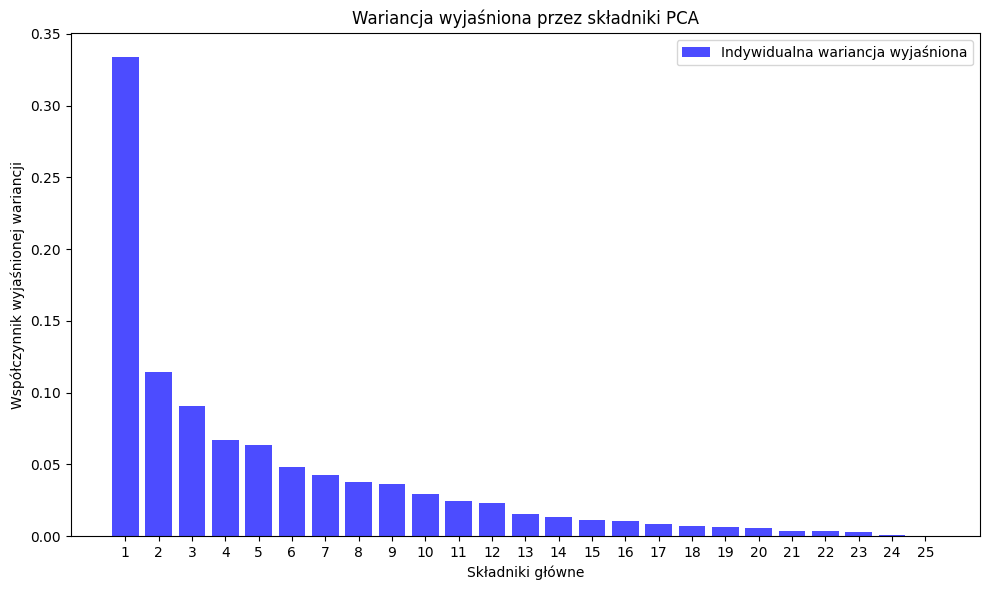

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue', label='Indywidualna wariancja wyjaśniona')
plt.ylabel('Współczynnik wyjaśnionej wariancji')
plt.xlabel('Składowe główne')
plt.title('Wariancja wyjaśniona przez składniki PCA')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend(loc='best')
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

## Klasteryzacja K-średnich

Popularna metoda analizy skupień (ang. cluster analysis) wykorzystywana w uczeniu maszynowym i statystyce do grupowania danych na podstawie ich cech. Metoda ta dzieli zbiór danych na K grup (klastrów), próbując zminimalizować wewnątrzgrupową wariancję.

Inicjalizacja algorytmu K-średnich z trzema klastrami.

In [10]:
kmeans = KMeans(n_clusters=3)

Stosowanie algorytmu K-średnich do głównych składowych (PCA components). Algorytm próbuje podzielić te dane na trzy klastry, a wynik zostaje zapisany w zmiennej clusters, która zawiera przypisanie każdej obserwacji do jednego z klastrów.

In [11]:
clusters = kmeans.fit_predict(principal_components)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inicjalizacja obiektu do kodowania etykiet, w naszym przykładzie jest to 'Region'.

In [12]:
# Kodowanie etykiet dla zmiennej 'Region'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Region'])

W tej części dzielimy dane na zestawy treningowe i testowe. Dane głównych składowych (PCA components) są podzielone na X_train i X_test, a etykiety (zmienna 'Region') są podzielone na y_train i y_test. Podział odbywa się w proporcji 70% treningowych danych do 30% testowych danych.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(principal_components, y, test_size=0.3, random_state=42)

Utworzenie modelu regresji logistycznej oraz trenowanie modelu na danych treningowych.\
**Regresja logistyczna (Logistic Regression)** to technika statystyczna wykorzystywana do modelowania zależności między zmienną niezależną (cechami) a binarną zmienną zależną (wynikiem). Innymi słowy, regresja logistyczna jest używana do przewidywania prawdopodobieństwa przynależności obiektu do jednej z dwóch klas (np. 0 lub 1, Tak lub Nie, Pozytywny lub Negatywny) na podstawie cech obiektu.
- model = LogisticRegression(max_iter=1000) tworzy model regresji logistycznej, który będzie używany do klasyfikacji danych.
- model.fit(X_train, y_train) trenuje model na danych treningowych. Model będzie próbował nauczyć się jak przypisać klasy (regiony) do danych głównych składowych.

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Użycie modelu do przewidywania etykiet na danych testowych.

In [15]:
y_pred = model.predict(X_test)

Tworzenie raportu klasyfikacji, aby ocenić wydajność modelu. Raport ten zawiera miary takie jak precyzja, odwołanie, wynik F1 dla każdego z regionów.

In [16]:
classification_report_result = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

Ten wykres punktowy (scatter plot) jest używany do wizualizacji podziału danych na klastry dokonanego przez algorytm K-średnich. Prezentuje on:

- Na osi poziomej znajduje się pierwszy składnik główny (PCA component 1).
- Na osi pionowej znajduje się drugi składnik główny (PCA component 2).
- Każdy punkt na wykresie reprezentuje jedną obserwację danych treningowych.
- Kolor punktu wskazuje, do którego klastra została przypisana ta obserwacja na podstawie wyników algorytmu K-średnich.

Dzięki temu wykresowi możesz zobaczyć, jak algorytm K-średnich podzielił dane na klastry i jakie obserwacje zostały przypisane do każdego klastra. Pomaga to wizualizować strukturę danych po redukcji wymiarów za pomocą PCA i ich podziale na klastry. \
W przypadku, gdy klastry są dobrze rozdzielone, można zaobserwować, że punkty przypisane do jednego klastra są blisko siebie na wykresie, podczas gdy punkty z różnych klastrów są od siebie oddzielone. \
W naszym przypadku klastry są niestety słabo rozdzielone, co może wynikać z tego że algorytm K-średnich może mieć trudności z efektywnym podziałem danych na grupy. Słabo rodzielone klastry mogą wynikać z różnych czynników, takich jak:
- Nakładanie się danych: Jeśli dane z różnych klastrów nachodzą na siebie, algorytm może mieć problem z jednoznacznym przypisaniem punktów do klastrów.
- Wyjątki lub szum w danych: Obserwacje odstające lub szum w danych mogą wpłynąć na proces klasteryzacji, ponieważ algorytm może próbować uwzględnić te punkty w klastrach, co może prowadzić do rozmycia granic między klastrami.

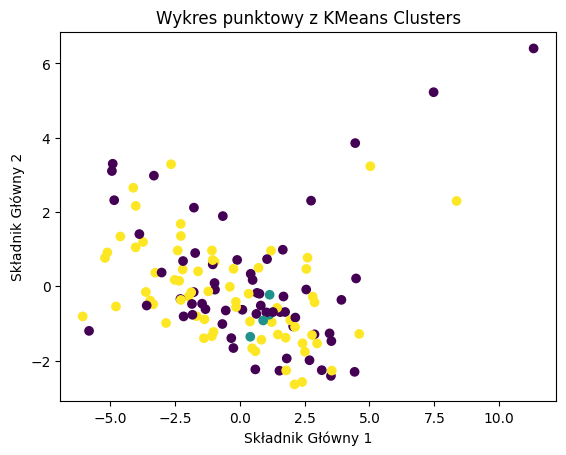

In [28]:
# Wykres punktowy (scatter plot)
plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters[:len(X_train)], cmap='viridis')
plt.xlabel('Składnik Główny 1')
plt.ylabel('Składnik Główny 2')
plt.title('Wykres punktowy z KMeans Clusters')

# Wyświetlenie wykresu
plt.show()

In [17]:
print(classification_report_result)

                              precision    recall  f1-score   support

                    Americas       0.64      0.50      0.56        14
                Asia-Pacific       0.78      0.70      0.74        10
                      Europe       0.80      1.00      0.89        12
Middle East and North Africa       0.50      0.75      0.60         4
          Sub-Saharan Africa       0.60      0.56      0.58        16

                    accuracy                           0.68        56
                   macro avg       0.66      0.70      0.67        56
                weighted avg       0.68      0.68      0.67        56



Precyzja (Precision), Odwołanie (Recall) i Wynik F1 (F1-Score) to trzy ważne metryki oceny jakości klasyfikacji w zadaniach uczenia maszynowego. Są one używane do pomiaru skuteczności modelu w identyfikowaniu pozytywnych i negatywnych przypadków w zadaniach klasyfikacyjnych. Oto ich definicje i znaczenia:

1. Precyzja (Precision):

    - Precyzja mierzy, jak wiele z pozytywnie sklasyfikowanych przypadków jest prawdziwymi pozytywnymi przypadkami spośród wszystkich pozytywnie sklasyfikowanych przypadków.
    - Precyzja ocenia, jak dokładny jest model w identyfikowaniu pozytywnych przypadków. Im wyższa precyzja, tym mniej fałszywych pozytywnych wyników.

2. Odwołanie (Recall):

    - Odwołanie mierzy, jak wiele z prawdziwych pozytywnych przypadków zostało zidentyfikowanych przez model spośród wszystkich rzeczywistych pozytywnych przypadków.
    - Odwołanie ocenia zdolność modelu do wykrywania wszystkich istotnych pozytywnych przypadków. Im wyższe odwołanie, tym mniej fałszywych negatywnych wyników.

3. Wynik F1 (F1-Score):

    - Wynik F1 to średnia harmoniczna precyzji i odwołania.
    - Jest obliczany jako 2×(Precyzja×Odwołanie)/(Precyzja+Odwołanie).
    - Wynik F1 jest używany do uwzględnienia zarówno precyzji, jak i odwołania. Jest szczególnie przydatny, gdy mamy do czynienia z niesymetrycznymi zbiorami danych lub chcemy znaleźć kompromis między precyzją a odwołaniem.
    - Im wyższy wynik F1, tym lepsza jakość klasyfikacji.
    
Podsumowując, precyzja mierzy dokładność pozytywnych wyników, odwołanie mierzy zdolność do wykrywania wszystkich pozytywnych przypadków, a wynik F1 łączy te dwie metryki w jedną wartość, co pozwala na ocenę ogólnej jakości klasyfikacji. W zależności od konkretnego zadania i priorytetów, można wybrać odpowiednią metrykę do oceny klasyfikatora.

In [18]:
labels = ["Americas", "Asia-Pacific", "Europe", "Middle East and North Africa", "Sub-Saharan Africa"]
precision = [0.64, 0.78, 0.80, 0.50, 0.60]
recall = [0.50, 0.70, 1.00, 0.75, 0.56]
f1_score = [0.56, 0.74, 0.89, 0.60, 0.58]

Ten wykres słupkowy (bar plot) prezentuje wyniki trzech różnych metryk oceny jakości klasyfikacji (precyzja, odwołanie, wynik F1) dla różnych grup regionów. Oto, co każdy element wykresu reprezentuje:

- Na osi poziomej (oś X) znajdują się grupy regionów, które są etykietami na osi X.
- Na osi pionowej (oś Y) znajdują się wyniki metryk jakości klasyfikacji, wyrażone w skali od 0 do 1.

Każdy słupek w wykresie reprezentuje jedną z trzech metryk (precyzja, odwołanie, wynik F1) dla danego regionu. Słupki są pogrupowane według grup regionów.

- Słupki przesunięte w lewo (słupki z odbitką w lewo) reprezentują wyniki precyzji (precision) dla poszczególnych grup regionów.
- Słupki w środku (środkowe słupki) reprezentują wyniki odwołania (recall) dla poszczególnych grup regionów.
- Słupki przesunięte w prawo (słupki z odbitką w prawo) reprezentują wyniki wyniku F1 (F1-score) dla poszczególnych grup regionów.

Ogólnie rzecz biorąc, ten wykres pozwala porównać wyniki metryk jakości klasyfikacji dla różnych grup regionów. Możemy zauważyć, które regiony osiągnęły najlepsze wyniki dla każdej z metryk i porównać, jak różne metryki działają w kontekście różnych regionów. Jest to przydatne narzędzie do oceny, w których obszarach klasyfikacja jest bardziej skuteczna i gdzie może być wymagana poprawa.

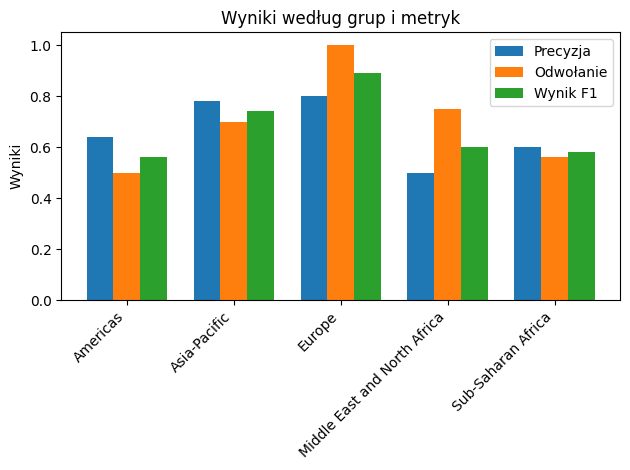

In [19]:
x = np.arange(len(labels))  
width = 0.25  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precyzja')
rects2 = ax.bar(x, recall, width, label='Odwołanie')
rects3 = ax.bar(x + width, f1_score, width, label='Wynik F1')

ax.set_ylabel('Wyniki')
ax.set_title('Wyniki według grup i metryk')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

## Reguły asocjacyjne

### Apriori

Algorytm wykorzystywany do wykrywania związków między elementami w zbiorze danych. Działa na zasadzie "kombinacji przed selekcją"- generuje kandydatów do związków, a następnie sprawdza ich częstotliwość występowania w danych. Algorytm przeszukuje zbiór danych, tworząc kombinacje elementów i sprawdzając, które z nich występują często jednocześnie. Te, które spełniają określone kryterium częstotliwości, są uznawane za istotne związki i zwracane jako wynik działania algorytmu.

*Czyli np. jak ktoś kupił 2 filmy to może ktoś inny kupił również 2 te same filmy*

Algorytm Apriori stosuje dwa główne kryteria do określania istotności związków między elementami w zbiorze danych: **wsparcie (support)** i **ufność (confidence)**. Te metryki pozwalają zidentyfikować i ocenić siłę związków asocjacyjnych między różnymi przedmiotami w zbiorze danych. Oto szczegółowe opisy tych kryteriów:

**Wsparcie (Support):**
- Wsparcie jest miarą popularności zestawu przedmiotów i jest definiowane jako proporcja transakcji w danych, które zawierają ten zestaw przedmiotów.
- Wskaźnik wsparcia jest podstawą algorytmu Apriori, który polega na idei, że im częściej występuje kombinacja przedmiotów, tym bardziej jest istotna.
- Jest to procentowy udział wszystkich transakcji, które zawierają dany zestaw przedmiotów, w stosunku do całkowitej liczby transakcji.
- Na przykład, jeśli zestaw przedmiotów {chleb, mleko} pojawia się w 100 z 1000 transakcji, wsparcie dla tego zestawu wynosi 10%.

**Ufność (Confidence):**
- Ufność jest miarą niezawodności wygenerowanej reguły asocjacyjnej.
- Definiuje się ją jako stosunek liczby transakcji zawierających wszystkie przedmioty z reguły, do liczby transakcji zawierających tylko przedmioty z lewej strony reguły.
- Innymi słowy, mierzy ona, jak często przedmioty po prawej stronie reguły występują w transakcjach, które zawierają przedmioty po lewej stronie.
- Na przykład, jeśli mamy regułę {chleb} -> {mleko} z ufnością 70%, oznacza to, że 70% transakcji z chlebem zawiera również mleko.

**Lift:**

Lift to miara używana w analizie reguł asocjacyjnych, takich jak te generowane przez algorytm Apriori. Pomaga określić, jak bardzo reguła asocjacyjna jest "interesująca" lub "informatywna" w kontekście analizy danych. W skrócie, lift informuje nas o tym, czy wystąpienie jednego elementu jest związane z wystąpieniem drugiego elementu w danej regule asocjacyjnej i w jakim stopniu.

Oto kilka kluczowych pojęć związanych z miarą lift:

- Lift > 1: Oznacza, że wystąpienie jednego elementu (lub zestawu elementów) zwiększa prawdopodobieństwo wystąpienia drugiego elementu. Im wyższy jest lift, tym silniejszy jest związek między tymi elementami.

- Lift = 1: Oznacza, że wystąpienie jednego elementu nie ma wpływu na prawdopodobieństwo wystąpienia drugiego elementu. Reguła asocjacyjna jest neutralna.

- Lift < 1: Oznacza, że wystąpienie jednego elementu zmniejsza prawdopodobieństwo wystąpienia drugiego elementu. W takim przypadku elementy są negatywnie skorelowane.

Interpretacja: Im większy lift, tym silniejszy związek między elementami. Na przykład, jeśli lift = 2, to oznacza, że wystąpienie jednego elementu jest dwukrotnie bardziej prawdopodobne, jeśli wystąpił drugi element w tej samej transakcji, w porównaniu do wystąpienia tego pierwszego elementu w ogóle transakcji.

**Przydatność:** Lift jest przydatny do wyboru najważniejszych reguł asocjacyjnych. Im wyższy lift, tym bardziej wartościowa jest reguła, ponieważ sugeruje, że występowanie jednego elementu ma wpływ na wystąpienie innego elementu.

In [20]:
with open("proj1.csv", "r") as f:
    csv_reader = csv.reader(f)
    transactions = list(csv_reader)

rules = apriori(transactions, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)

lgorytm ten przeszukuje zbiór danych w celu znalezienia częstych zestawów elementów, które spełniają te kryteria. Funkcja "prepare_output" jest używana do przetwarzania wyników algorytmu Apriori i tworzenia czytelnej tabeli wynikowej. Wyniki zawierają informacje o zestawach elementów (Items), wsparciu (Support), ufności (Confidence) i lift (Lift).\
Wyniki są sortowane w kolejności malejącej na podstawie wartości "Lift", co oznacza, że zestawy elementów są uporządkowane od tych, które mają największy wpływ na siebie nawzajem.

In [21]:
def prepare_output(results):
    Support, Confidence, Lift, Items, Antecedent, Consequent = [], [], [], [], [], []

    for RelationRecord in results:
        for ordered_stat in RelationRecord.ordered_statistics:
            Support.append(RelationRecord.support)
            Items.append(set(RelationRecord.items))
            Antecedent.append(set(ordered_stat.items_base))
            Consequent.append(set(ordered_stat.items_add))
            Confidence.append(ordered_stat.confidence)
            Lift.append(ordered_stat.lift)

    df = pd.DataFrame({
        'Items': Items,
        'Antecedent': Antecedent,
        'Consequent': Consequent,
        'Support': Support,
        'Confidence': Confidence,
        'Lift': Lift
    })

    return df

Wyniki te pozwalają zrozumieć, które zestawy elementów są często występujące i mają silne związki wzajemne w analizowanych danych. Dla każdego zestawu elementów można ocenić, jakie są wsparcie, ufność i lift, co pomaga w identyfikacji istotnych związków między elementami w danych.

In [22]:
results = prepare_output(rules)

sorted_results = results.sort_values("Lift", ascending=False)

print(sorted_results)

                                                 Items  \
548  {STREET, MANHATTAN, FELONY, COMPLETED, SEXUAL ...   
920  {STREET, MANHATTAN, SEX CRIMES, FELONY, COMPLE...   
925  {STREET, MANHATTAN, SEX CRIMES, FELONY, COMPLE...   
550  {STREET, MANHATTAN, FELONY, COMPLETED, SEXUAL ...   
922  {STREET, MANHATTAN, SEX CRIMES, FELONY, COMPLE...   
..                                                 ...   
500  {RESIDENCE-HOUSE, SEX CRIMES, BROOKLYN, FELONY...   
497  {RESIDENCE-HOUSE, SEX CRIMES, BROOKLYN, FELONY...   
676  {RESIDENCE-HOUSE, MISDEMEANOR, SEX CRIMES, STA...   
679  {RESIDENCE-HOUSE, MISDEMEANOR, SEX CRIMES, STA...   
239  {COMPLETED, RESIDENCE-HOUSE, MISDEMEANOR, STAT...   

                                          Antecedent  \
548                                 {STREET, FELONY}   
920                                 {STREET, FELONY}   
925                     {STREET, SEX CRIMES, FELONY}   
550                      {COMPLETED, STREET, FELONY}   
922                    